## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Exercise 12.1

Confronto le performances della rete neurale usando tre diversi ottimizzatori: GDS, Adam e Adadelta.

In [115]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [116]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [117]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [118]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [119]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model_SGD():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

def compile_model_Adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

def compile_model_Adadelta():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['accuracy'])
    return model

print('Models compiled successfully and ready to be trained.')

Models compiled successfully and ready to be trained.


In [120]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_SGD = compile_model_SGD()
model_DNN_Adam = compile_model_Adam()
model_DNN_Adadelta = compile_model_Adadelta()

H = []

# train DNN and store training info in history
history_SGD = model_DNN_SGD.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

H.append(history_SGD)

history_Adam = model_DNN_Adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

H.append(history_Adam)

history_Adadelta = model_DNN_Adadelta.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=15,
          verbose=1,
          validation_data=(X_test, Y_test))

H.append(history_Adadelta)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7280 - accuracy: 0.7884 - val_loss: 0.3027 - val_accuracy: 0.9176
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3727 - accuracy: 0.8941 - val_loss: 0.2341 - val_accuracy: 0.9320
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3016 - accuracy: 0.9159 - val_loss: 0.1968 - val_accuracy: 0.9423
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2598 - accuracy: 0.9276 - val_loss: 0.1722 - val_accuracy: 0.9476
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2301 - accuracy: 0.9352 - val_loss: 0.1571 - val_accuracy: 0.9505
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2832 - accuracy: 0.9172 - val_loss: 0.1060 - val_accuracy: 0.9684
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1206 - accuracy: 0.9657 - val_loss: 0.0889 - val_accuracy: 0.9

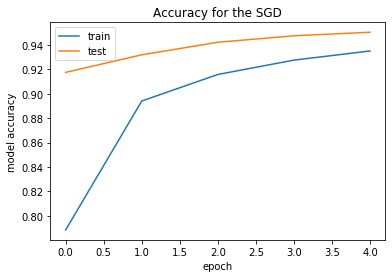

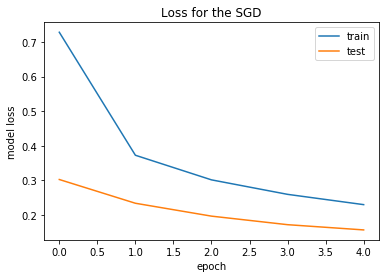

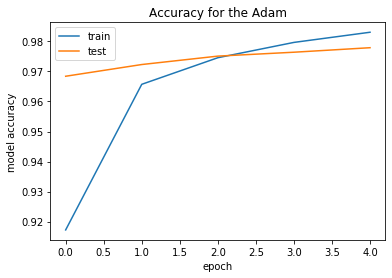

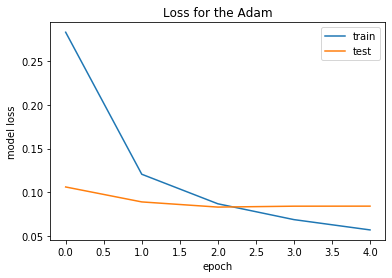

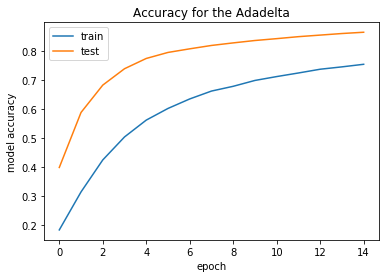

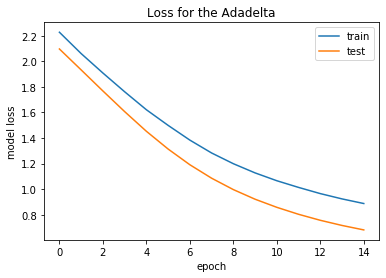

In [121]:
# evaluate model
#score = model_DNN_Adam.evaluate(X_test, Y_test, verbose=1)

# print performance
#print()
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(H[0].history['accuracy'])
plt.plot(H[0].history['val_accuracy'])
plt.title('Accuracy for the SGD')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(H[0].history['loss'])
plt.plot(H[0].history['val_loss'])
plt.title('Loss for the SGD')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for accuracy
plt.plot(H[1].history['accuracy'])
plt.plot(H[1].history['val_accuracy'])
plt.title('Accuracy for the Adam')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(H[1].history['loss'])
plt.plot(H[1].history['val_loss'])
plt.title('Loss for the Adam')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for accuracy
plt.plot(H[2].history['accuracy'])
plt.plot(H[2].history['val_accuracy'])
plt.title('Accuracy for the Adadelta')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(H[2].history['loss'])
plt.plot(H[2].history['val_loss'])
plt.title('Loss for the Adadelta')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

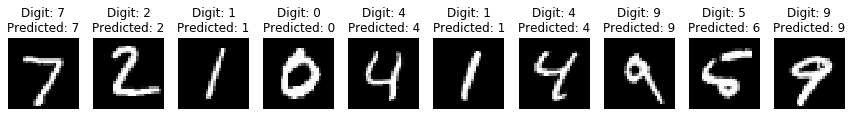

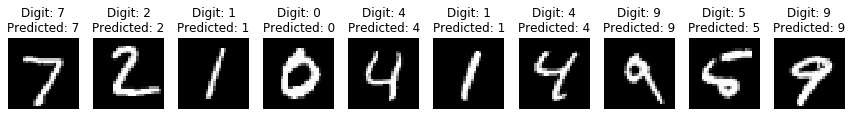

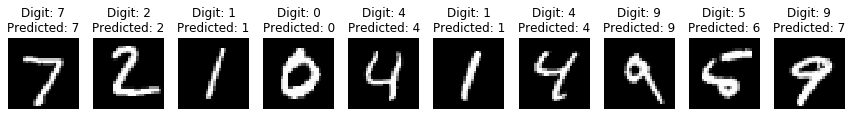

In [122]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions_SGD = model_DNN_SGD.predict(X_test)
predictions_Adam = model_DNN_Adam.predict(X_test)
predictions_Adadelta = model_DNN_Adadelta.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions_SGD[i])))    
    plt.axis('off') 
plt.show()

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions_Adam[i])))    
    plt.axis('off') 
plt.show()

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions_Adadelta[i])))    
    plt.axis('off') 
plt.show()

Dalle curve di lost e accuracy l'ottimizzatore che permette alla rete di performare meglio risulta essere Adam. Il test effettuato con le immagini conferma quanto ipotizzato: la rete indovina 10 cifre su 10. 

Utilizzando l'ottimizzatore SGD si ottengono valori di accuracy e di loss molto buoni, anche se inferiori a quelli ottenuti con Adam. In questo caso la rete indovina 9 cifre su 10.

Con Adadelta invece i valori di accuracy dopo 5 epoche sono talmente bassi che si è deciso di prolungare l'addestramento fino a 15 epoche. Alla fine del training tuttavia la rete è in grado di indivinare solo 8 cifre su 10.

### Exercise 12.2

#### Creating Convolutional Neural Nets with Keras

Costruisco una rete convoluzionale costituita dai seguenti strati:
- layer convoluzionale con 6 filtri 5x5, funzione di attivazione relu
- layer MaxPooling 2X2
- layer convoluzionale con 16 filtri 5x5, funzione di attivazione relu
- layer di Dropout (0.2)
- layer MaxPooling 2x2
- layer Flatten, per trasformare il tensore in un vettore 1D
- layer denso con funzione di attivazione softmax che da in output un vettore di 10 elementi

In [123]:
#you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [124]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)),)
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)),)
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
     

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model


In [125]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5839 - accuracy: 0.8138 - val_loss: 0.2266 - val_accuracy: 0.9390
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2088 - accuracy: 0.9379 - val_loss: 0.1575 - val_accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1622 - accuracy: 0.9514 - val_loss: 0.1164 - val_accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1362 - accuracy: 0.9582 - val_loss: 0.0988 - val_accuracy: 0.9721
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0917 - accuracy: 0.9749

Test loss: 0.09165369719266891
Test accuracy: 0.9749000072479248


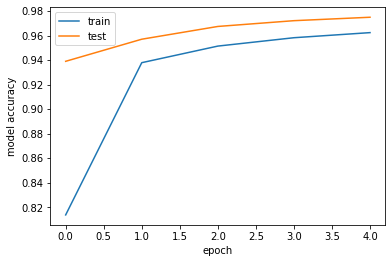

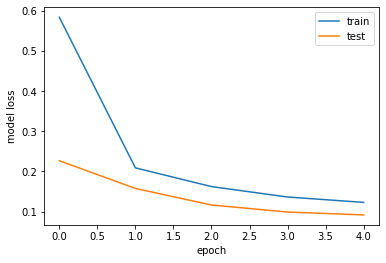

In [126]:

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

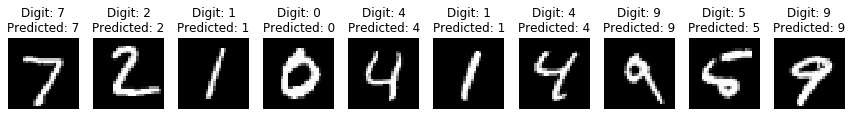

In [127]:

predictions = model_CNN.predict(X_test)



plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

La rete convoluzionale presenta un valore di accuracy del 97% ed è in grado di indovinare 10 digits su 10.

### Exercise 12.3

Testo ora la rete CNN su 10 immagini che rappresentano le cifre da 0 a 9 scritte da me.

In [128]:
from PIL import Image
import os

digit_filename = []
digit_in = []

for i in range(10):
    digit_filename.append("immagini/imm"+str(i)+".png")
    digit_in.append(Image.open(digit_filename[i]).convert('L'))



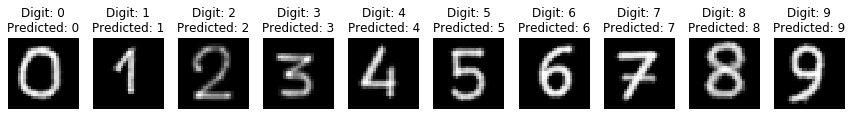

In [129]:
data = data.reshape(xdim,ydim)
plt.figure(figsize=(15, 15)) 
for j in range (10):
    ydim, xdim = digit_in[j].size
    pix = digit_in[j].load()
    data = np.zeros((xdim, ydim))
    for h in range (ydim):
            for g in range(xdim):
                data[g,h]=pix[h,g]
    data /= 255
    
    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(1, 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(1, img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    
    pred_0 = model_CNN.predict(data)
    
    data = data.reshape(xdim,ydim)
    
    ax = plt.subplot(2, 10, j + 1)    
    plt.imshow(data, cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(j, np.argmax(pred_0)))    
    plt.axis('off') 
plt.show()


La rete ha indovinato 10 cifre su 10 disegnate con una grafia diversa da quella su cui si è allenata, dimostrando di aver acquisito competenze sufficientemente solide da riuscire a classificare immagini con caratteristiche che deviano leggermente da quelle con cui sono stati ottimizzati i parametri.